In [1]:
library(dplyr)
library(Seurat)
library(patchwork)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching SeuratObject



In [21]:
library(repr)
options(repr.plot.width=15, repr.plot.height=8)

In [9]:
pre_data <- Read10X(data.dir = "sc_data_mex/")

In [10]:
pre_sc_obj <- CreateSeuratObject(counts = pre_data, project = "PrE", min.cells = 3, min.features = 200)

In [11]:
pre_sc_obj[["percent.mt"]] <- PercentageFeatureSet(pre_sc_obj, pattern = "^MT-")

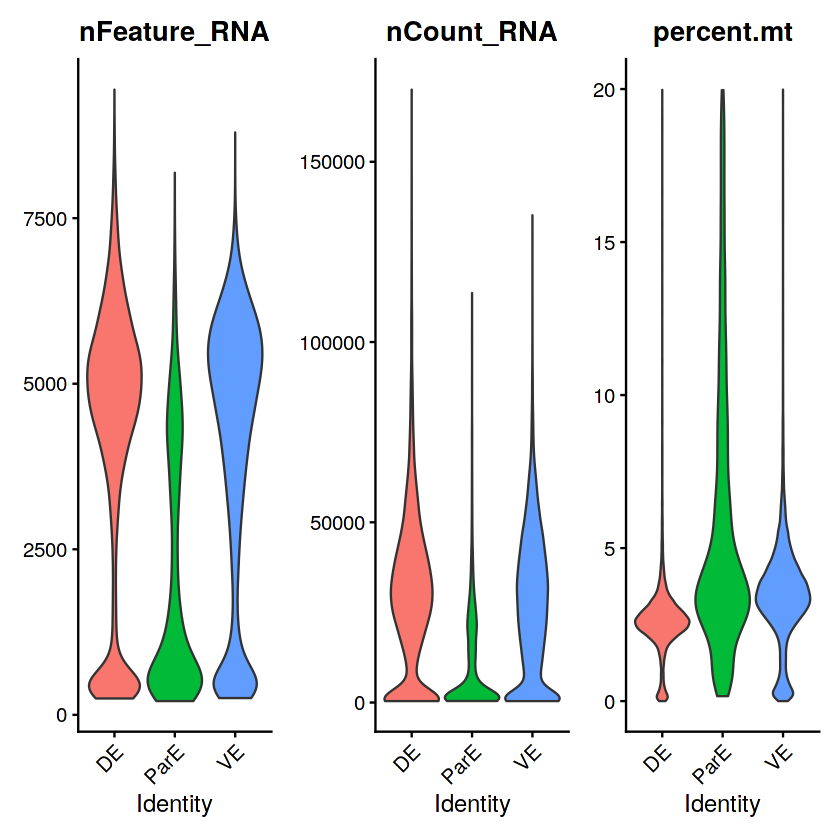

In [13]:
VlnPlot(pre_sc_obj, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3, pt.size=0)

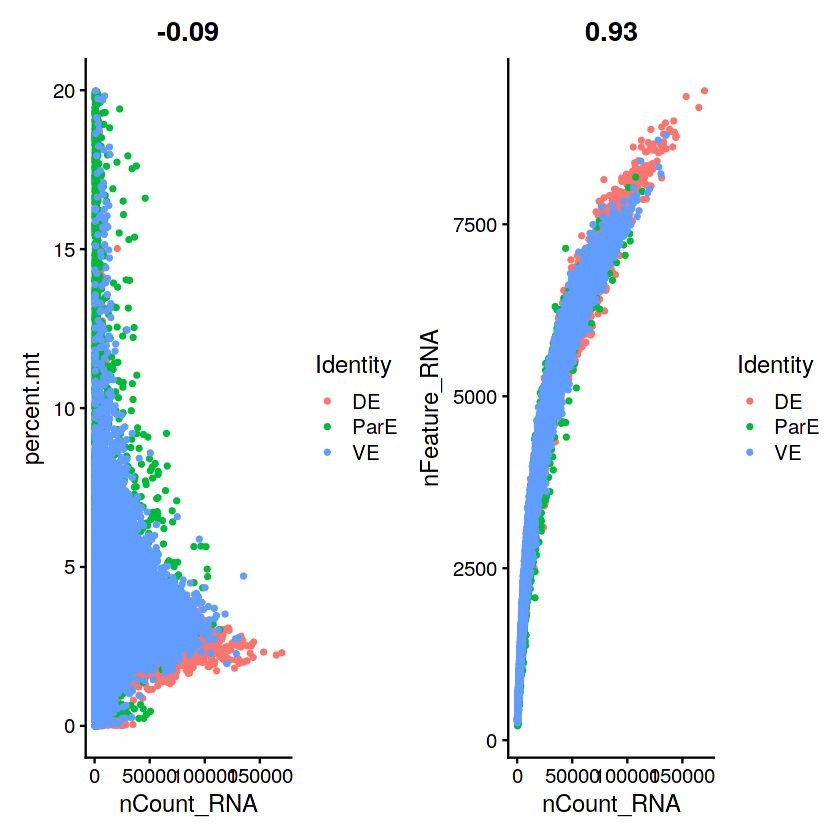

In [14]:
plot1 <- FeatureScatter(pre_sc_obj, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pre_sc_obj, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [15]:
pre_sc_obj <- subset(pre_sc_obj, subset = nFeature_RNA > 250 & nFeature_RNA < 8000 & percent.mt < 5)

In [16]:
pre_sc_obj <- NormalizeData(pre_sc_obj)

In [44]:
pre_sc_obj <- FindVariableFeatures(pre_sc_obj, selection.method = "vst", nfeatures = 2000)

# Identify the 10 most highly variable genes
top20 <- head(VariableFeatures(pre_sc_obj), 20)

When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Removed 4 rows containing missing values (geom_point).”
Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


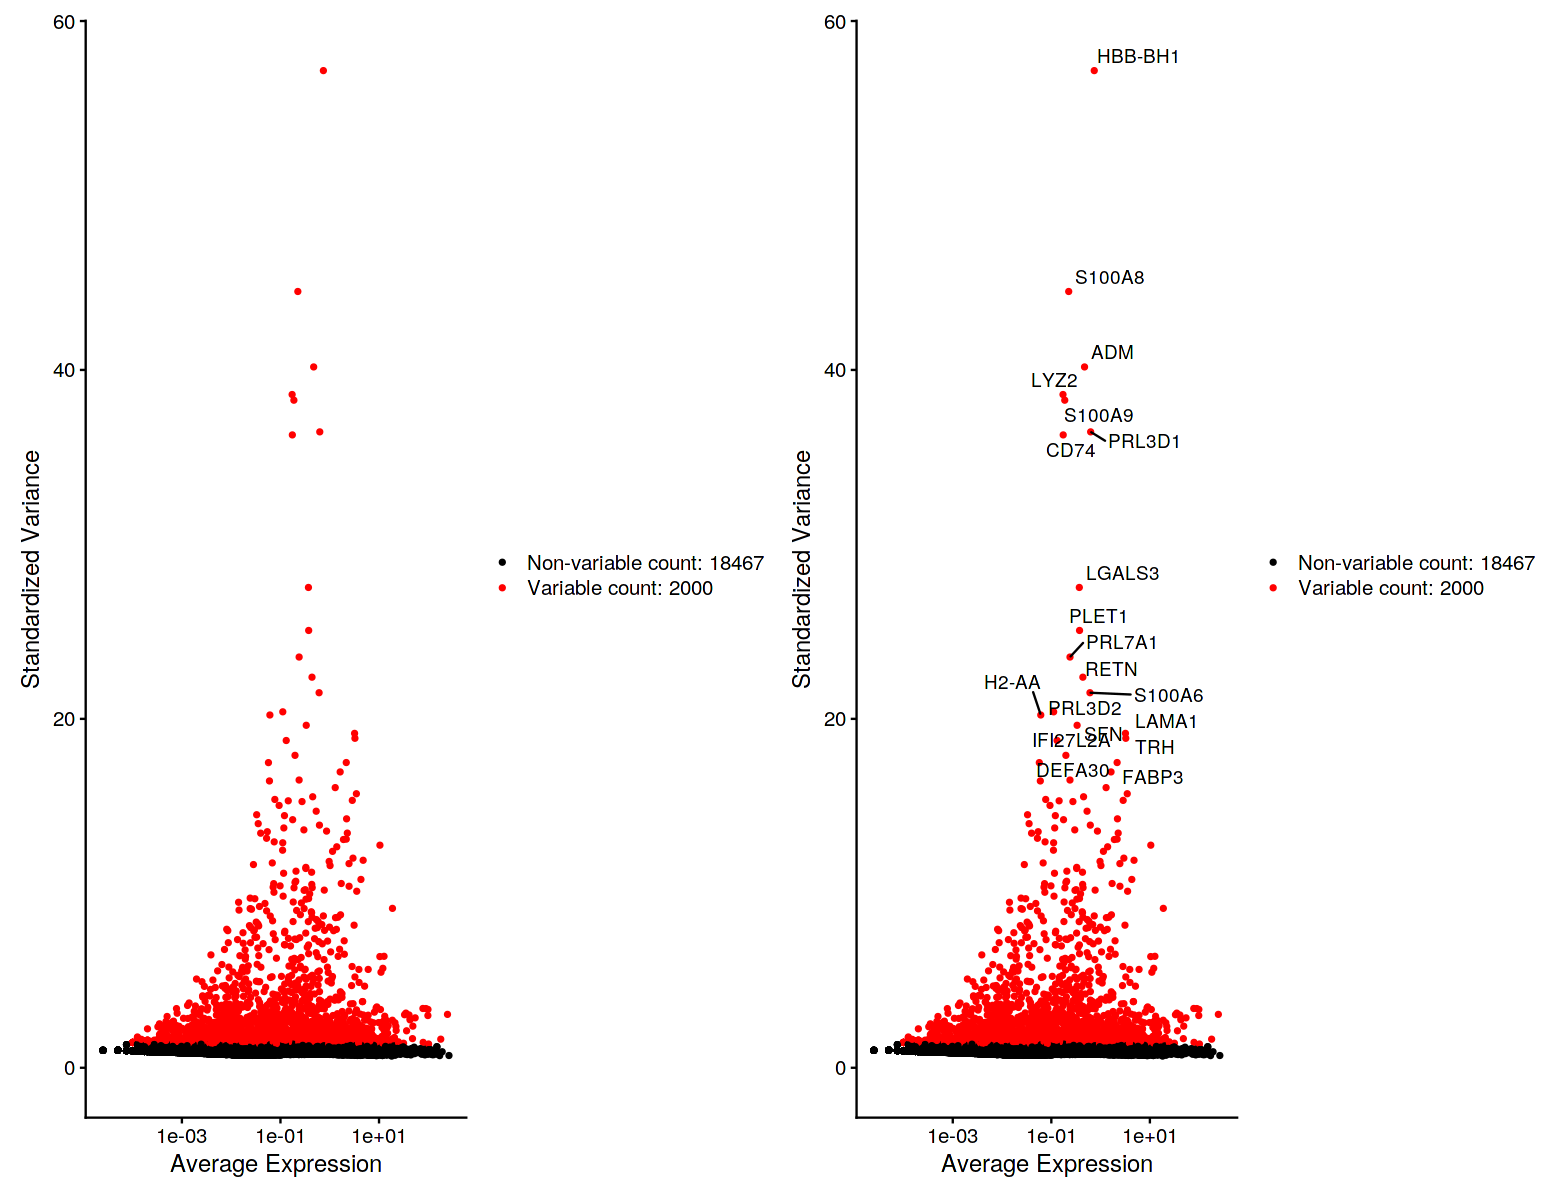

In [45]:
# plot variable features with and without labels
plot1 <- VariableFeaturePlot(pre_sc_obj)
plot2 <- LabelPoints(plot = plot1, points = top20, repel = TRUE)
plot1 + plot2

In [46]:
pre_sc_obj <- ScaleData(pre_sc_obj)

Centering and scaling data matrix



In [47]:
pre_sc_obj <- RunPCA(pre_sc_obj)

PC_ 1 
Positive:  TMSB10, SOX11, PBX1, IFITM2, MARCKS, HMGA2, SNRPN, TEAD2, 2810417H13RIK, TUBA1A 
	   SMS, CHD7, IFITM1, MARCKSL1, NNAT, SOX4, BASP1, POU5F1, CCND2, FABP5 
	   H2AFY2, CNN3, CCND1, SIVA1, HMGB3, CALD1, HMGN3, FSCN1, FLNA, PSIP1 
Negative:  RBP4, TTR, APOA1, APOM, LGMN, DAB2, SPINK1, AMN, CUBN, APOB 
	   CTSH, CTSL, CITED1, APOE, SLC13A4, CLIC6, H19, MT1, APOA4, CTSB 
	   RHOX5, FOLR1, LGALS2, APOA2, MTTP, NPL, CTSZ, ATP1B1, MT2, SLC2A2 
PC_ 2 
Positive:  PIFO, CFAP126, 1110017D15RIK, TEKT1, EFCAB10, 1700016K19RIK, RIIAD1, 2410004P03RIK, NME5, FOXJ1 
	   DYNLRB2, DNAJB13, NOTO, FAM183B, CFAP45, CAPSL, EFCAB1, 1700028P14RIK, RSPH1, CFAP206 
	   1700007K13RIK, DRC1, CFAP53, ENKUR, ERICH2, TCTEX1D1, CCPG1OS, MLF1, TTC25, GM16702 
Negative:  LAMA1, NID1, SRGN, FABP3, LAMC1, P4HA2, EPAS1, HS3ST1, ADAMTS9, CRYAB 
	   GREM2, LAMB1, TINAGL1, THBD, TIMP2, PMEPA1, COL4A2, PLOD2, HBB-BS, FXYD3 
	   F3, WFDC1, BMPER, FST, STRA6, SOX7, FABP3-PS1, GATA6, P3H4, SLC6A2 
PC_ 3 
Positive

In [31]:
print(pre_sc_obj[["pca"]], dims = 11:15, nfeatures = 30)

PC_ 11 
Positive:  GAS6, CDX1, KITL, ZFP703, STARD8, SP5, RSPO3, HOXB1, TUBB2B, MALAT1 
	   HES7, FN1, MCC, HOXA1, FGFBP1, TBX6, ALDH1A2, CDX2, ABHD2, CDH1 
	   GBX2, DSP, AXIN2, TRH, ZFP503, CPM, ECSCR, NRARP, PEG10, FZD10 
Negative:  UBB, PRMT1, LDHA, ENO1, ALX1, DDX39, NDUFA9, GAPDH, TPI1, TYMS 
	   MDH1, ATP5B, MYL7, MDH2, PPID, GRHPR, AIMP2, ADH5, PPP1R1A, VPS29 
	   GALK1, PA2G4, PSMD7, SSR2, SUCLG1, CAR14, ADRB3, TECR, MANF, ALDOA 
PC_ 12 
Positive:  FOXC2, FOXC1, FAM212A, PCDH19, TCF15, LHFP, CER1, SFRP1, GATA1, LEFTY2 
	   OTX2, CITED4, DLL1, ALX1, LHX1, RIMBP2, PCDH8, LRIG3, RASGRP3, HBB-BH1 
	   PKDCC, IRX5, TWIST1, ADRB3, SNCA, LMO2, RELN, ADGRG1, HHEX, TMEM132C 
Negative:  PMP22, BMP4, DOK4, SPIN2C, FOXF1, LRRN4, AHNAK, TBX20, STARD8, UNC5C 
	   HAND1, HAND2, AKAP12, COL1A1, CDX2, HOXD1, SNAI2, MSX2, NRP1, ARL4C 
	   TMEM88, CRB2, NKX1-2, TDO2, TAGLN, BMP5, HS6ST2, PIM2, TMEM108, GATA5 
PC_ 13 
Positive:  PIM2, BMP2, CDKN1C, CXCL12, PGA5, ELAVL3, 2900011O08RIK, PDZD4, JPH4

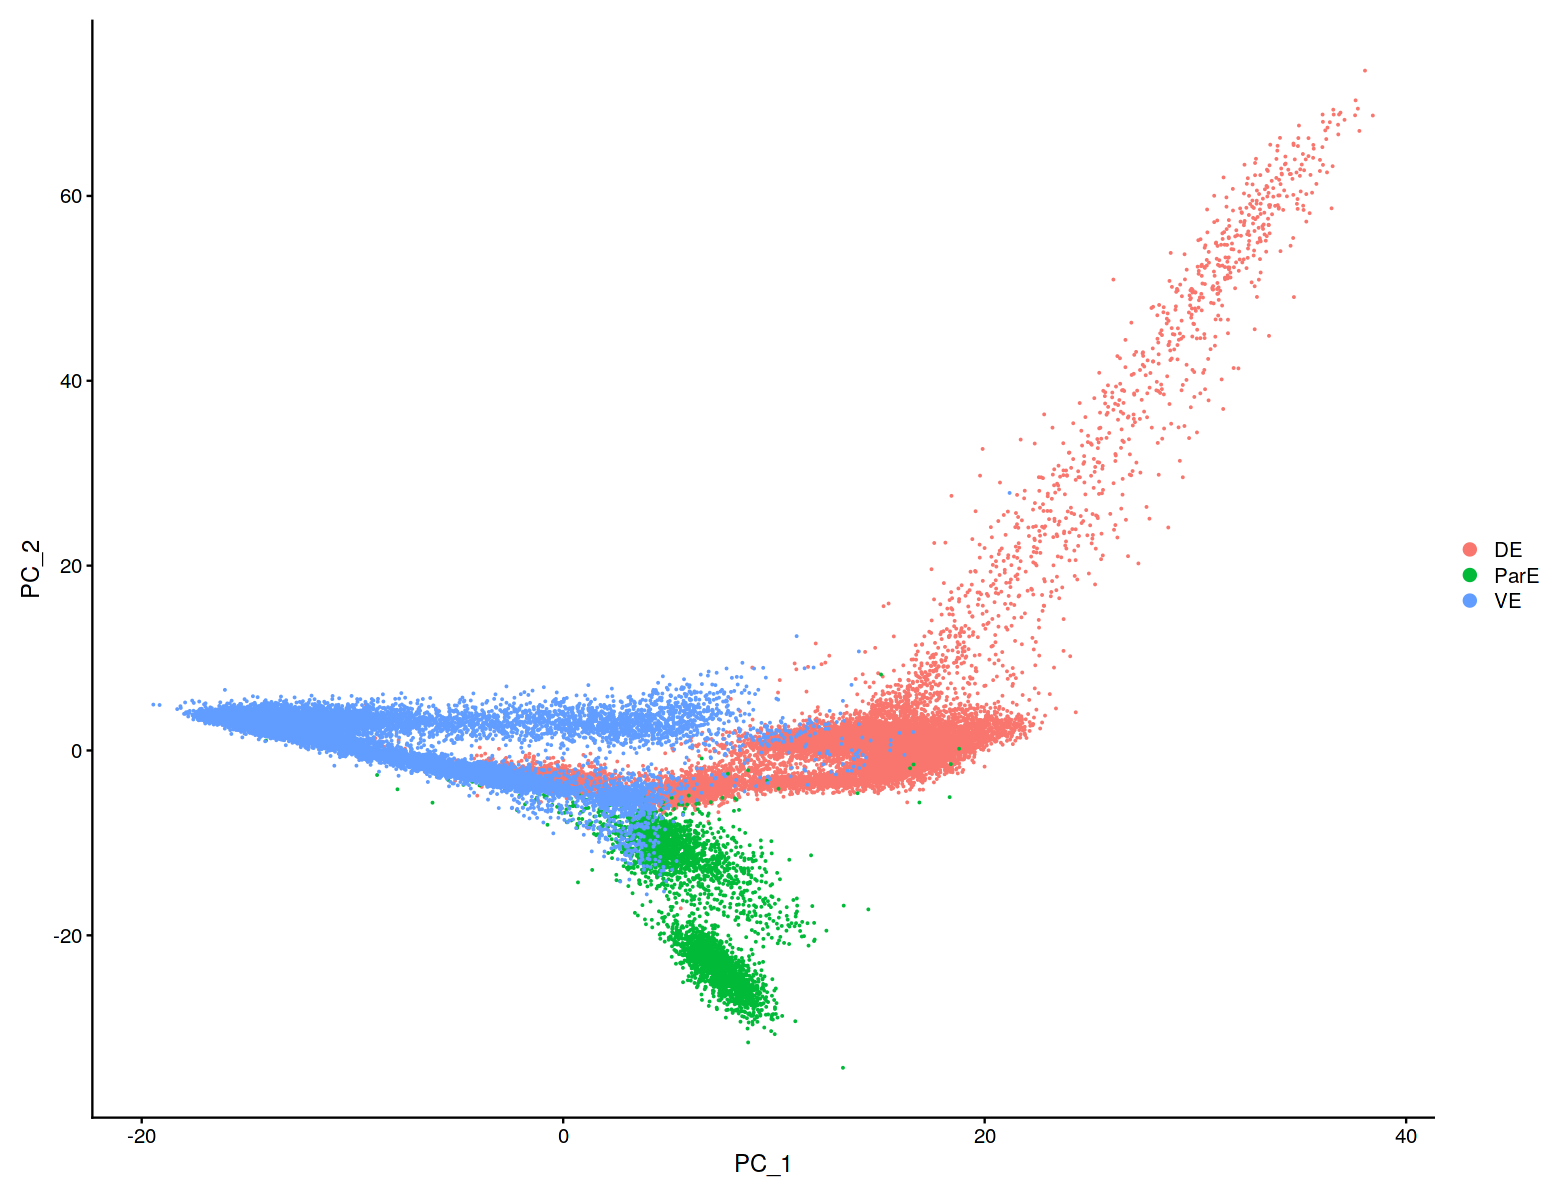

In [48]:
DimPlot(pre_sc_obj, reduction = "pca")

In [49]:
pre_sc_obj <- RunUMAP(pre_sc_obj, dims = 1:7)

23:50:13 UMAP embedding parameters a = 0.9922 b = 1.112

23:50:13 Read 39929 rows and found 7 numeric columns

23:50:13 Using Annoy for neighbor search, n_neighbors = 30

23:50:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:50:18 Writing NN index file to temp file /tmp/Rtmp0n5oY9/file409276d12a47

23:50:18 Searching Annoy index using 1 thread, search_k = 3000

23:50:35 Annoy recall = 100%

23:50:35 Commencing smooth kNN distance calibration using 1 thread

23:50:38 Initializing from normalized Laplacian + noise

23:50:47 Commencing optimization for 200 epochs, with 1569422 positive edges

23:51:08 Optimization finished



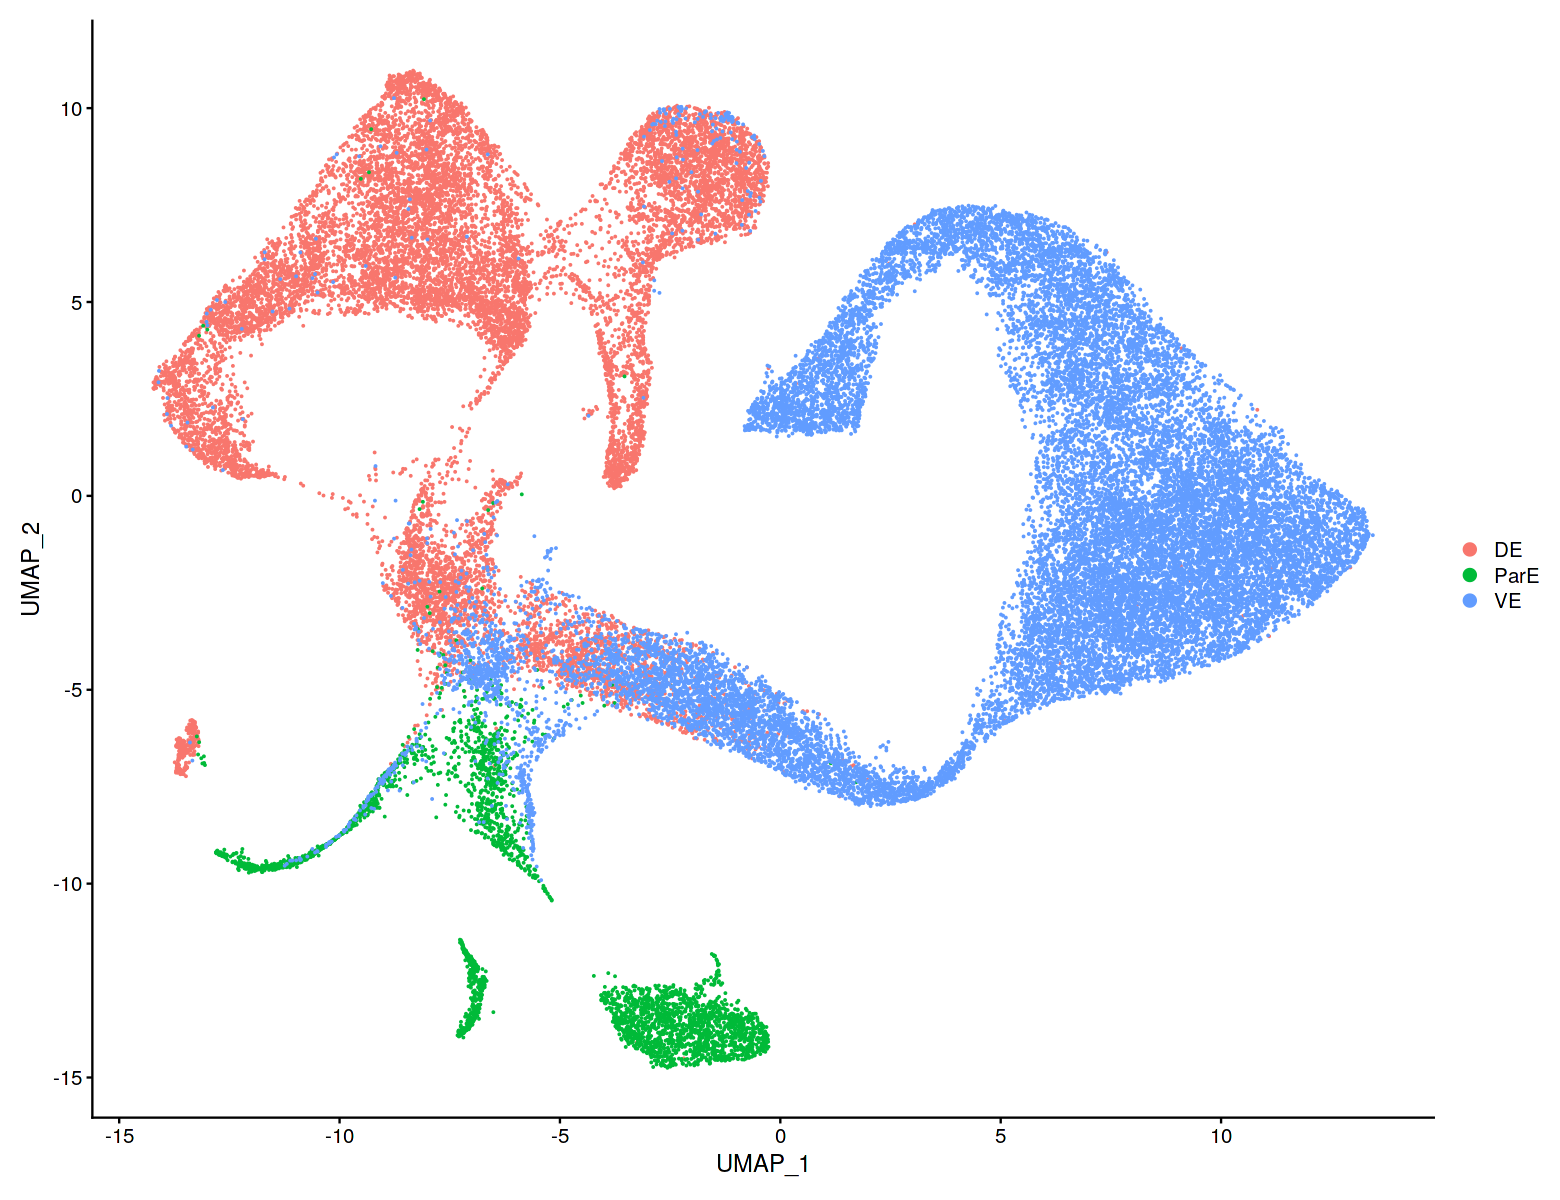

In [50]:
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(pre_sc_obj, reduction = "umap")

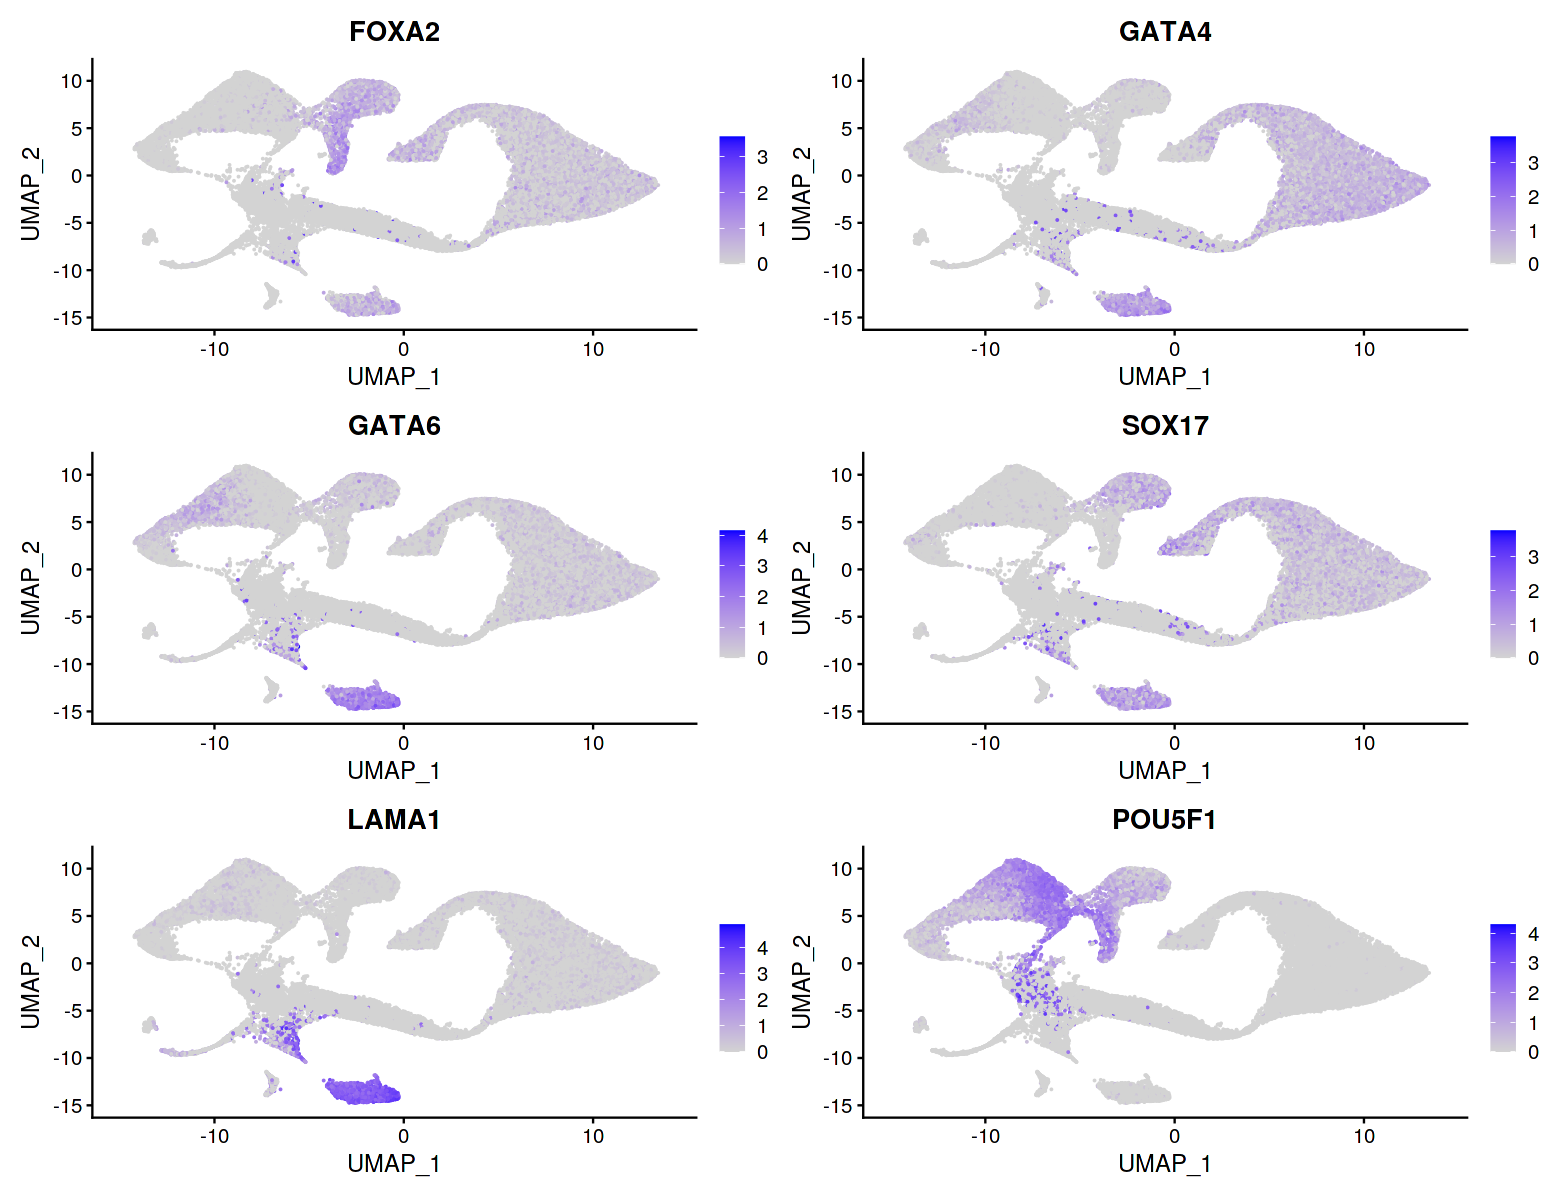

In [52]:
FeaturePlot(pre_sc_obj, features = c("FOXA2", "GATA4", "GATA6", "SOX17", "LAMA1", "POU5F1"))

In [53]:
pre_sc_obj <- SCTransform(pre_sc_obj, vars.to.regress = "percent.mt", verbose = FALSE)

In [54]:
pre_sc_obj <- RunPCA(pre_sc_obj)

PC_ 1 
Positive:  TTR, APOA1, SPINK1, RBP4, APOM, APOE, MT1, APOA2, LGMN, MT2 
	   FTH1, CTSL, DAB2, APOB, S100G, H19, CUBN, AMN, CITED1, CTSH 
	   APOA4, SLC2A3, RHOX5, AFP, CYBA, LGALS2, CTSB, CAR4, EMB, CTSZ 
Negative:  FST, TMSB10, SRGN, LAMA1, LAMC1, FABP3, LAMB1, NID1, COL4A1, COL4A2 
	   SERPINH1, SPARC, PLOD2, HS3ST1, CRYAB, ADAMTS9, P4HA2, EPAS1, TINAGL1, CALD1 
	   IFITM1, CD9, TMSB4X, PTMA, PTH1R, HBB-BS, T, FXYD3, THBD, POU5F1 
PC_ 2 
Positive:  SPARC, COL4A1, SRGN, LAMC1, LAMA1, COL4A2, FABP3, LAMB1, NID1, SERPINH1 
	   FST, HS3ST1, PLOD2, TINAGL1, P4HA2, CRYAB, CD9, ADAMTS9, EPAS1, APOA1 
	   TTR, PTH1R, RBP4, SPINK1, FXYD3, THBD, F3, HBB-BS, GREM2, FABP3-PS1 
Negative:  IFITM1, T, POU5F1, CD24A, 2810417H13RIK, IFITM2, SOX11, PTMA, CCND2, TUBA1A 
	   PHLDA2, RPLP0, SMS, HMGA2, FABP5, PIFO, MARCKS, RSPO3, CER1, EFCAB10 
	   FOXJ1, 1110017D15RIK, MEST, APELA, TMSB10, NNAT, PPP1R1A, PBX1, MARCKSL1, TPPP3 
PC_ 3 
Positive:  TYROBP, CD52, FCER1G, LST1, TMSB4X, H2-D1, B2M, PLAC

In [55]:
pre_sc_obj <- RunUMAP(pre_sc_obj, dims = 1:30)

00:18:26 UMAP embedding parameters a = 0.9922 b = 1.112

00:18:26 Read 39929 rows and found 30 numeric columns

00:18:26 Using Annoy for neighbor search, n_neighbors = 30

00:18:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:18:32 Writing NN index file to temp file /tmp/Rtmp0n5oY9/file40924f9df4bb

00:18:32 Searching Annoy index using 1 thread, search_k = 3000

00:18:47 Annoy recall = 100%

00:18:47 Commencing smooth kNN distance calibration using 1 thread

00:18:50 Initializing from normalized Laplacian + noise

00:18:54 Commencing optimization for 200 epochs, with 1680574 positive edges

00:19:16 Optimization finished



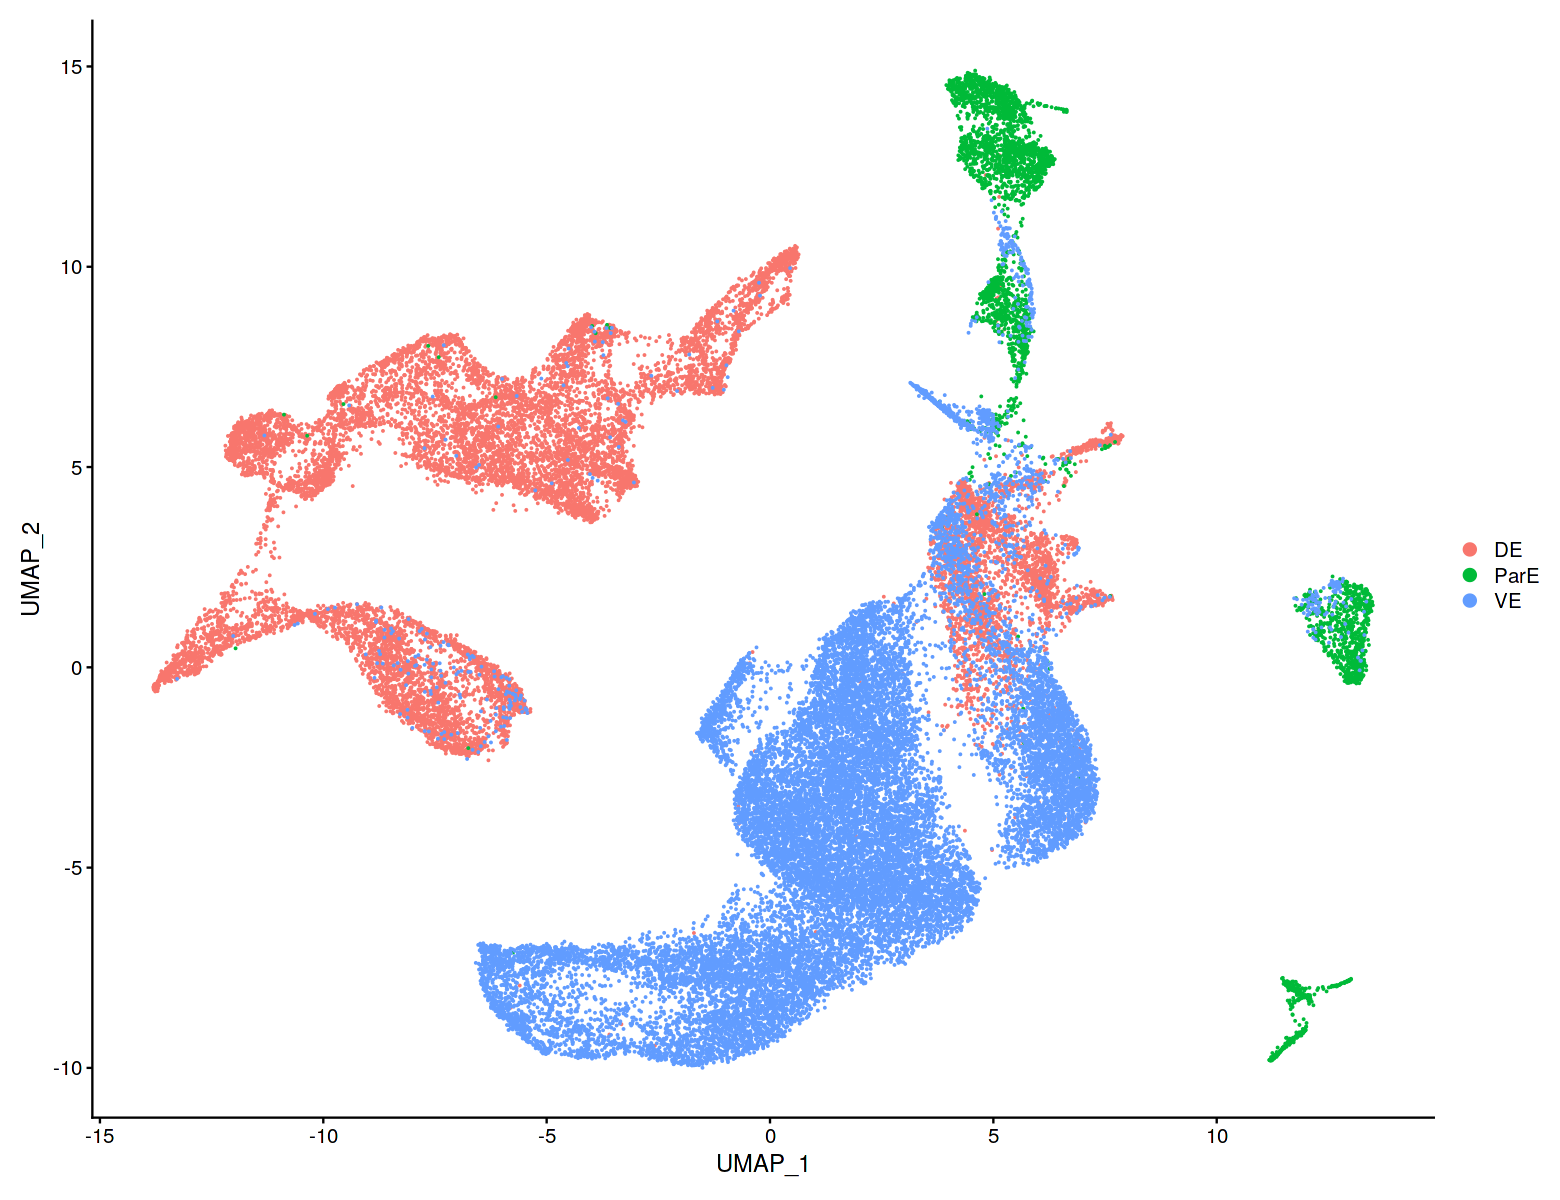

In [56]:
options(repr.plot.width=13, repr.plot.height=10)
DimPlot(pre_sc_obj, reduction = "umap")

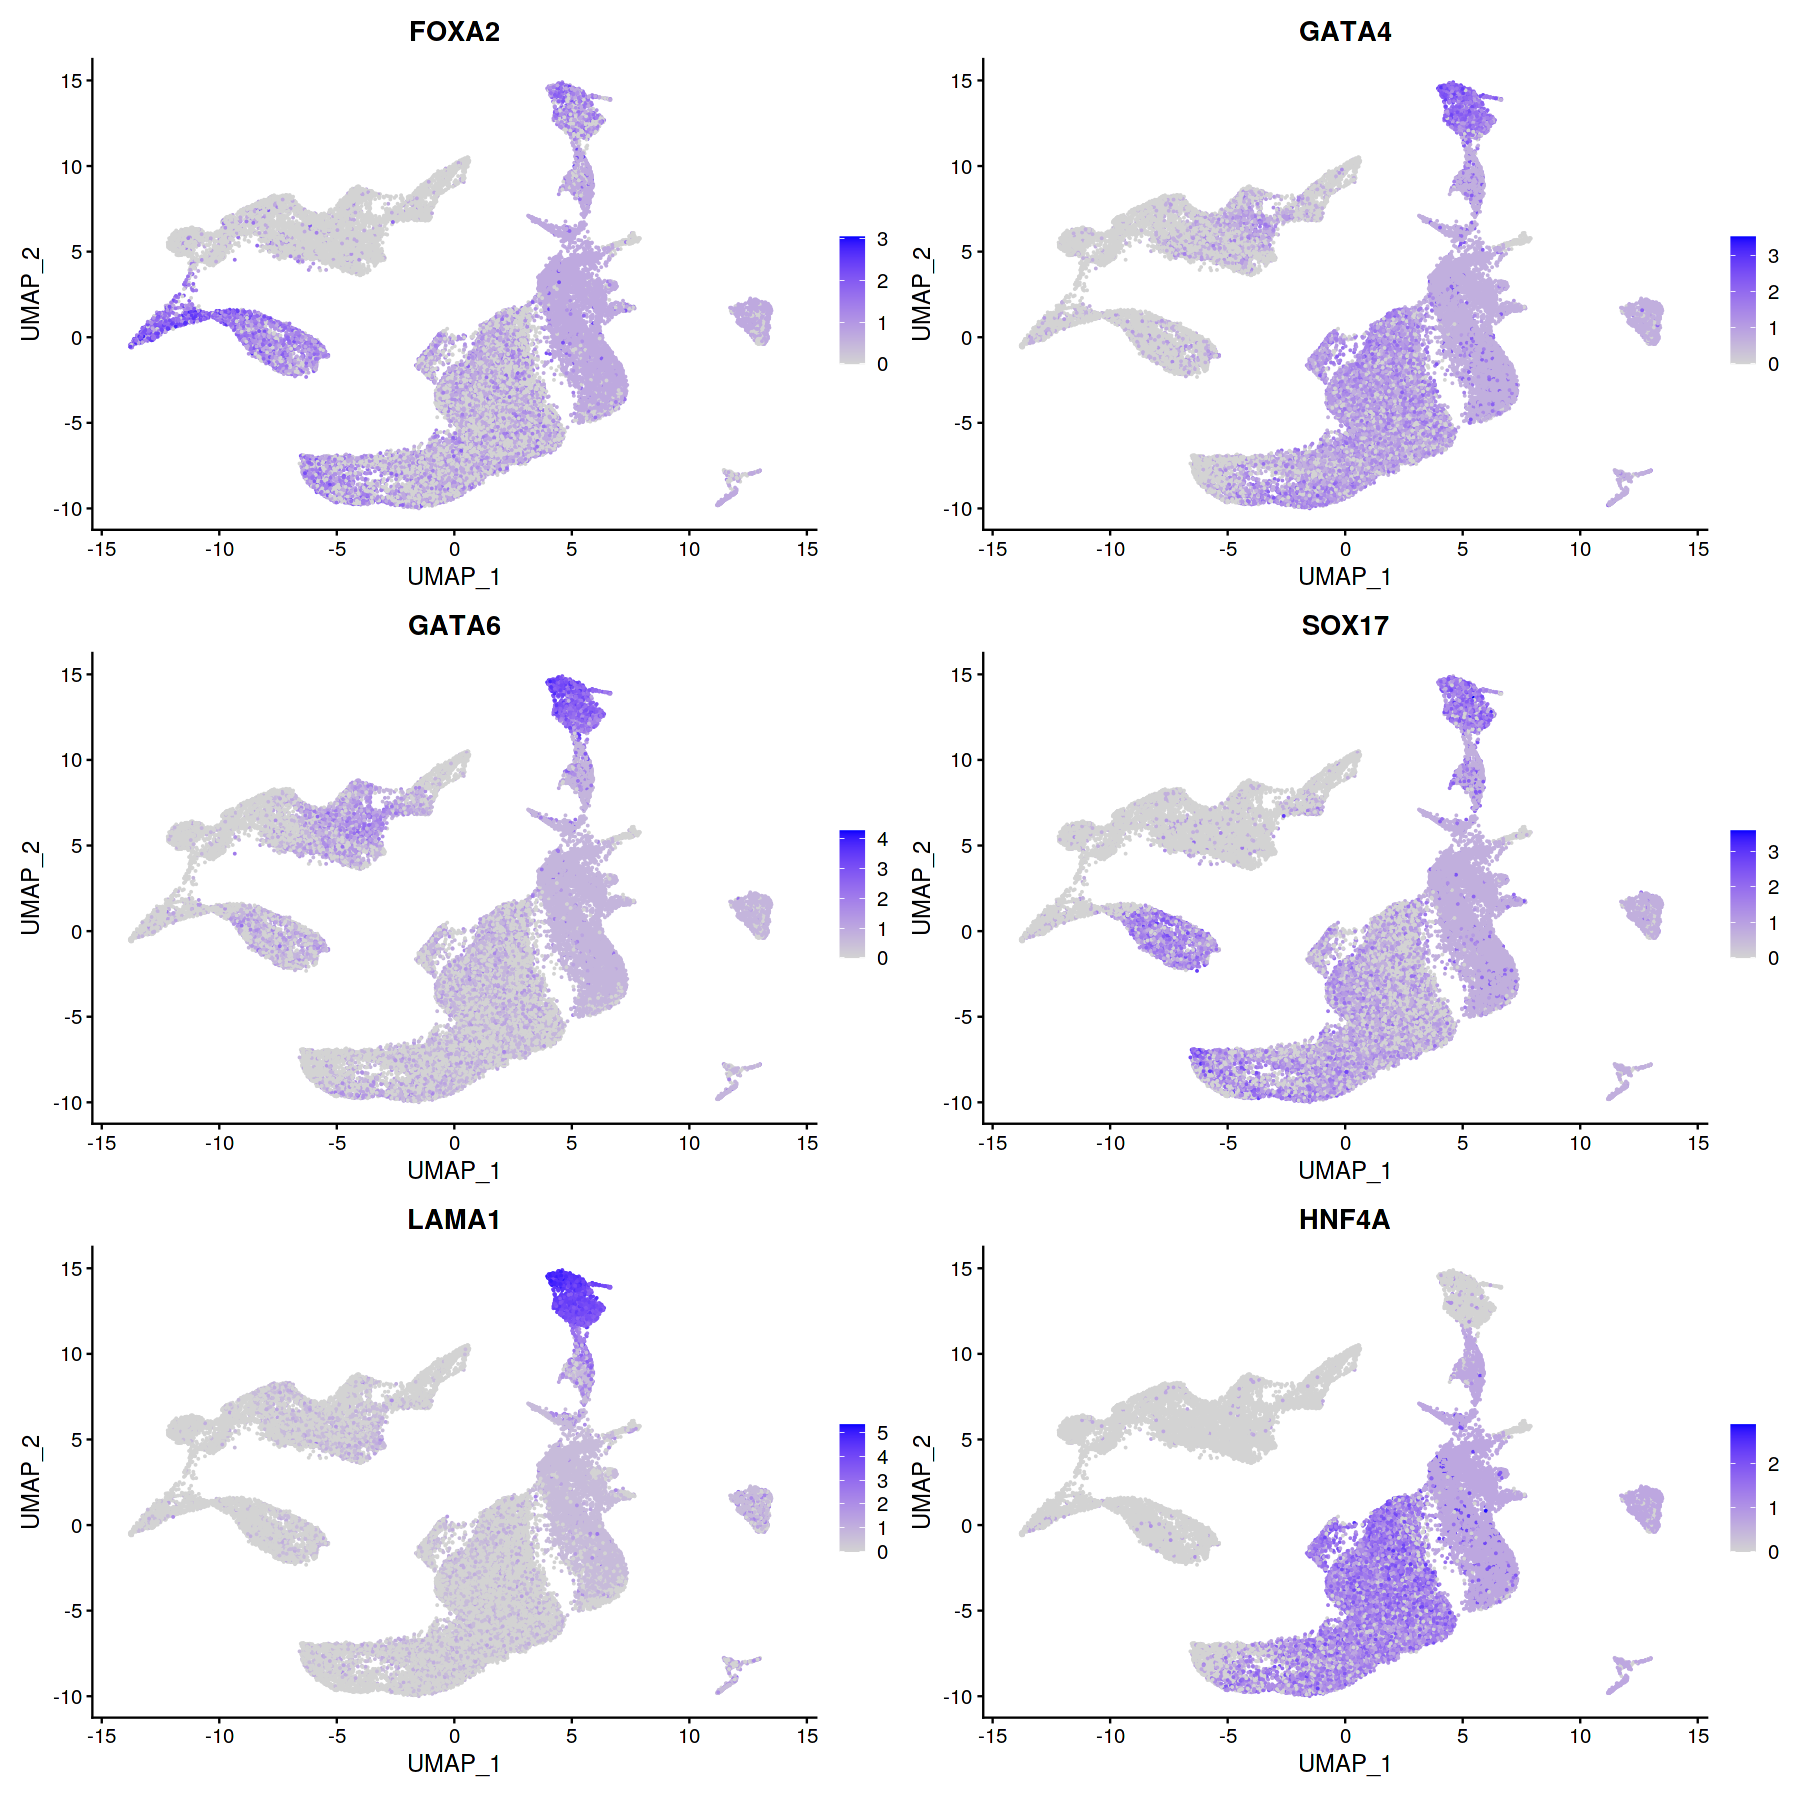

In [66]:
options(repr.plot.width=15, repr.plot.height=15)
FeaturePlot(pre_sc_obj, features = c("FOXA2", "GATA4", "GATA6", "SOX17", "LAMA1", "HNF4A"))

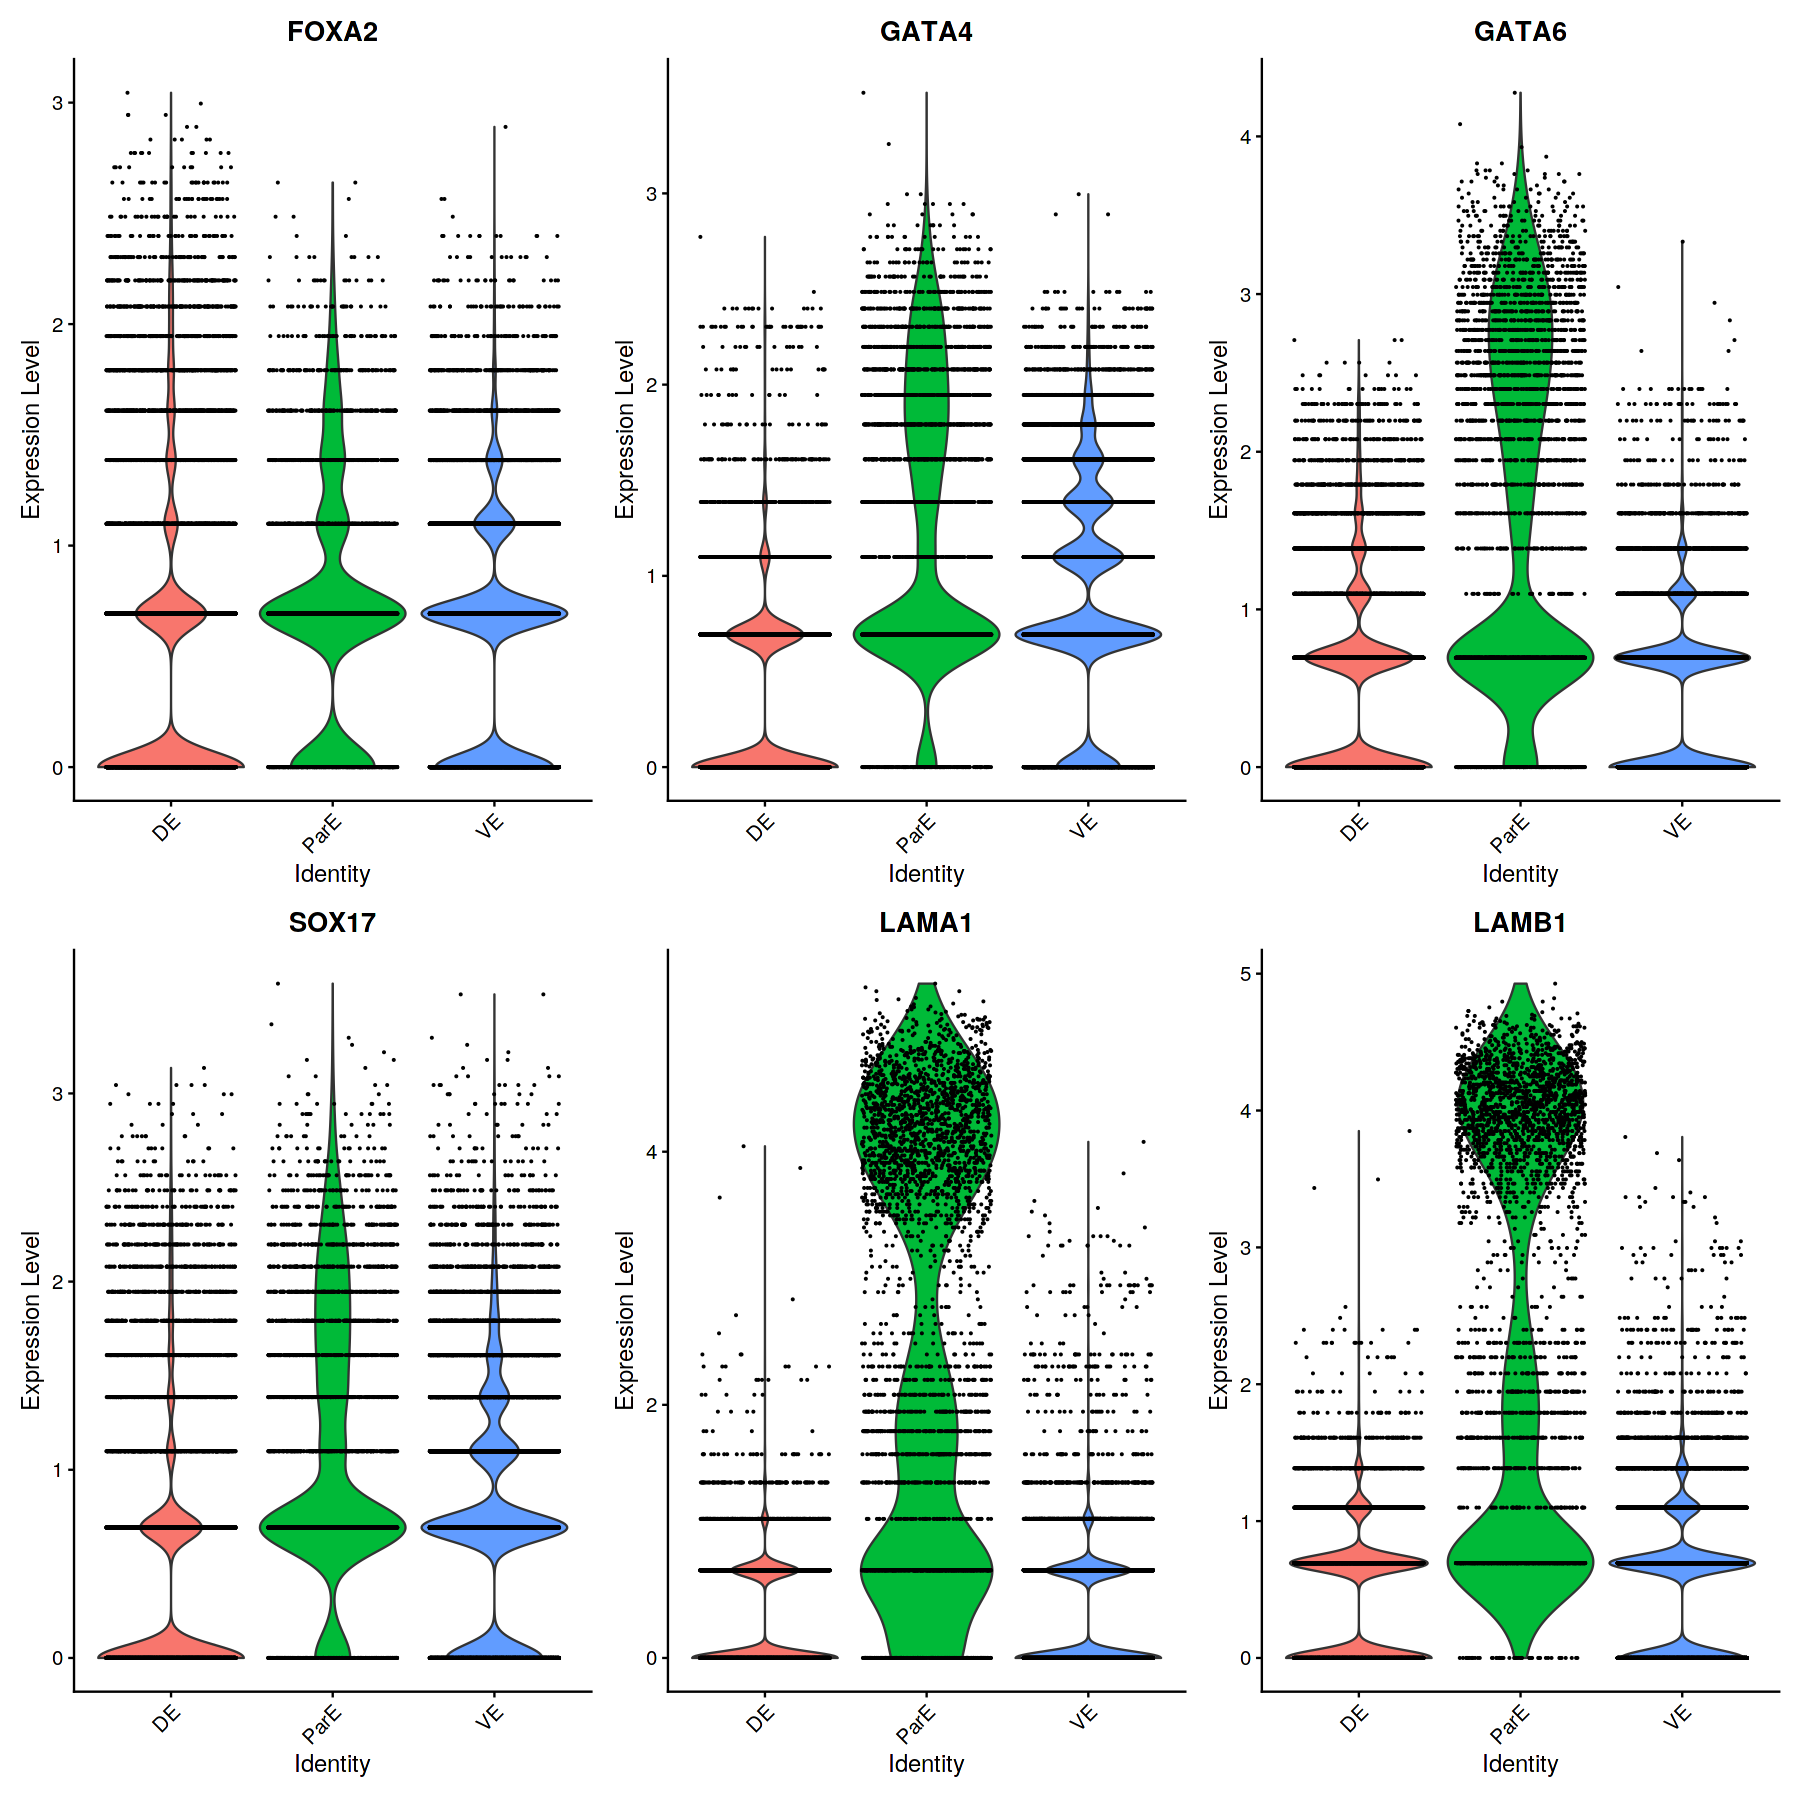

In [64]:
options(repr.plot.width=15, repr.plot.height=15)
VlnPlot(pre_sc_obj, features = c("FOXA2", "GATA4", "GATA6", "SOX17", "LAMA1", "LAMB1"))